In [35]:
# import the packages
from tsv_data_analytics import tsvutils
from tsv_data_analytics_ext import graphext

# these imports are just for wide display in notebook
import pandas as pd
import statistics
from IPython.core.display import display,HTML
display(HTML("<style>.container { width:100% !important;}</style>"))
display(HTML("<style>div.output_scroll { height: 60em; }</style>"))
pd.options.mode.chained_assignment = None  # default='warn'
pd.set_option('display.max_rows', 1000)
pd.set_option('max_colwidth', 100)

In [2]:
# read data
x = tsvutils.read_url("https://github.com/owid/covid-19-data/raw/master/public/data/owid-covid-data.csv")

In [3]:
# show raw data
x.export_to_df(5)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,,,,,...,,,37.746,0.5,64.83,0.511,,,,
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,,,,,...,,,37.746,0.5,64.83,0.511,,,,
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,,,,,...,,,37.746,0.5,64.83,0.511,,,,
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,,,,,...,,,37.746,0.5,64.83,0.511,,,,
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,,,,,...,,,37.746,0.5,64.83,0.511,,,,


In [37]:
# fill in missing values
y = x \
    .set_missing_values(["new_cases", "new_deaths", "life_expectancy", "handwashing_facilities", "human_development_index"], "0")


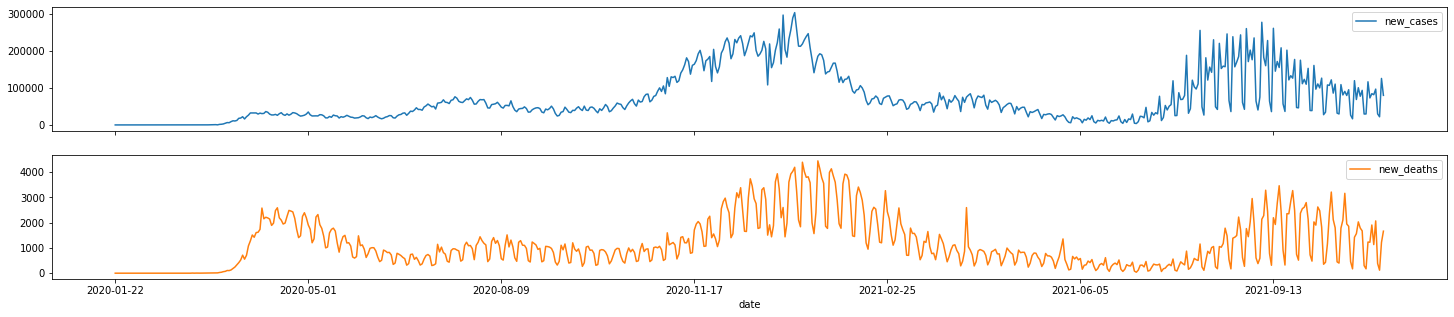

In [5]:
# plot for daily new cases and deaths in USA. Multiple columns can be plotted in the same graph. subplots = False will use only single plot
y1 = y \
    .values_in("iso_code", ["USA"])
graphext.linechart(y1, "date", ["new_cases", "new_deaths"], subplots = True)

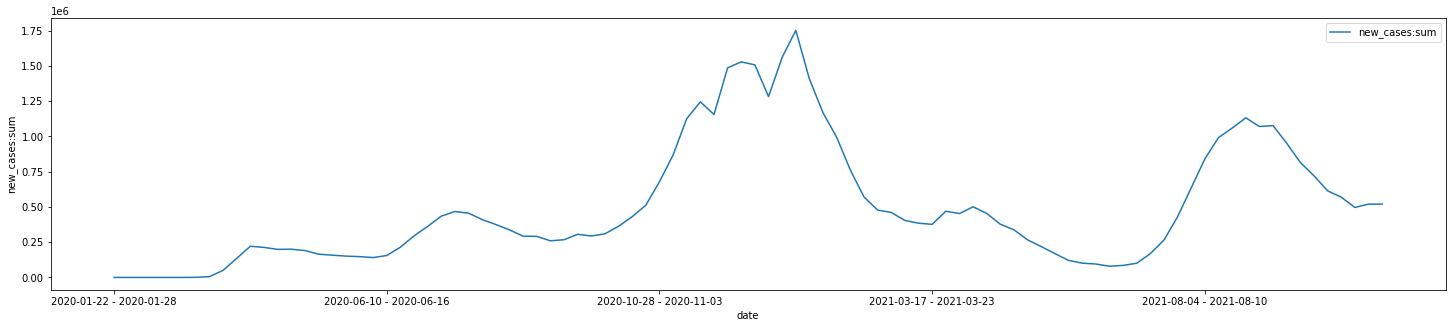

In [23]:
# plot for weekly new cases in USA. The weekly are non overlapping. Notice the order of aggregating columns, aggregating functions and the new column names suffix
y2 = y \
    .eq_str("iso_code", "USA") \
    .window_aggregate(["iso_code"], "date", ["new_cases"], "", [sum], winsize = 7, sliding = False)

graphext.linechart(y2, "date", ["new_cases:sum"])

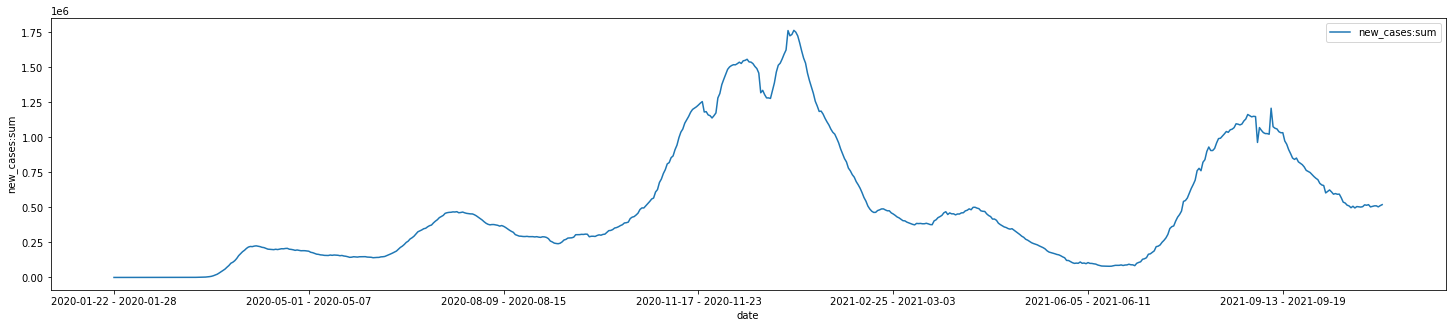

In [24]:
# plot for weekly new cases in USA. The weekly are overlapping using a sliding window
y3 = y \
    .eq_str("iso_code", "USA") \
    .window_aggregate(["iso_code"], "date", ["new_cases"], "", [sum], winsize = 7, sliding = True)

graphext.linechart(y3, "date", ["new_cases:sum"])

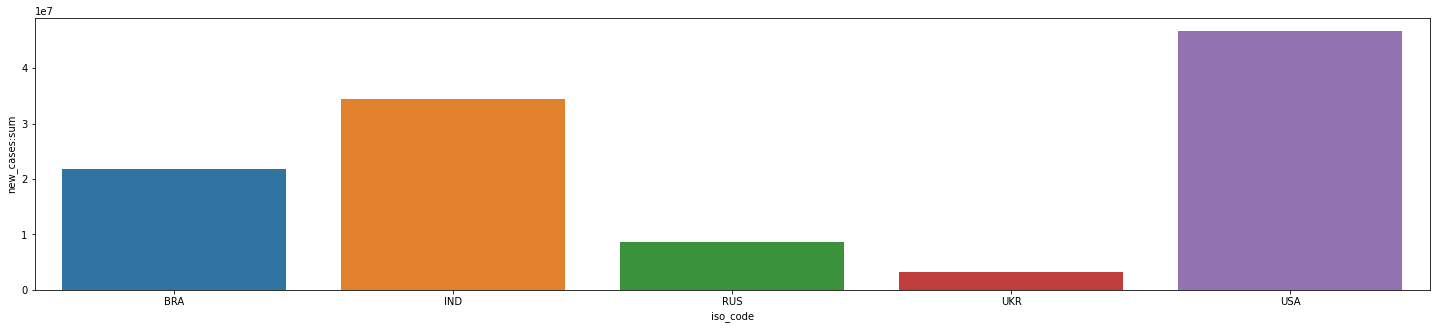

In [13]:
# plot for total cases in specific countries
y4 = y \
    .values_in("iso_code", ["USA", "IND", "RUS", "UKR", "BRA", "CZK"]) \
    .aggregate("iso_code", ["new_cases", "new_deaths"], [sum, sum])

graphext.barchart(y4, "iso_code", "new_cases:sum")

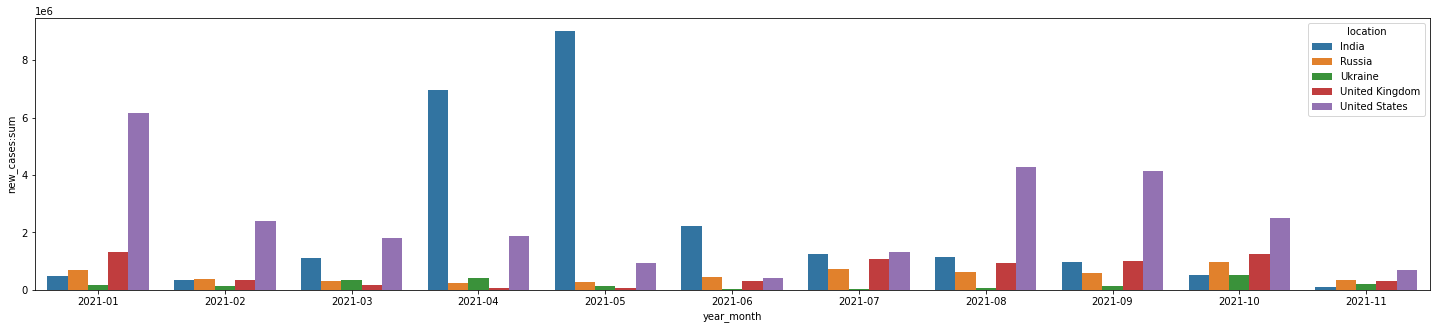

In [22]:
# plot for total cases in specific countries
y5 = y \
    .values_in("iso_code", ["USA", "IND", "RUS", "UKR", "UKR", "GBR"]) \
    .transform("date", lambda x: x[0:7], "year_month") \
    .filter(["date"], lambda x: x.startswith("2021")) \
    .aggregate(["iso_code", "location", "year_month"], ["new_cases"], [sum])

graphext.barchart(y5, "year_month", "new_cases:sum", "location")

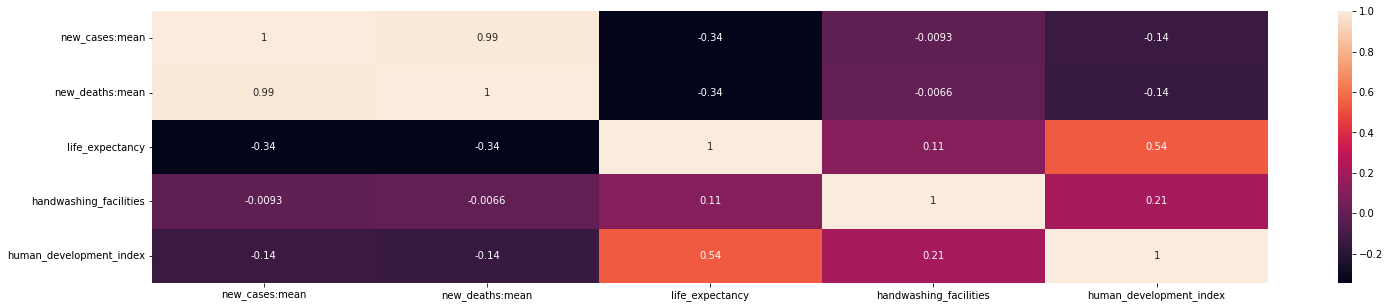

In [36]:
# heatmap for correlation across values for all countries
y6 = y \
    .aggregate(["iso_code"], ["new_cases", "new_deaths", "life_expectancy", "handwashing_facilities", "human_development_index"], [statistics.mean, statistics.mean, min, min, min]) \
    .remove_suffix("min")

graphext.corr_heatmap(y6, ["new_cases:mean", "new_deaths:mean", "life_expectancy", "handwashing_facilities", "human_development_index"])

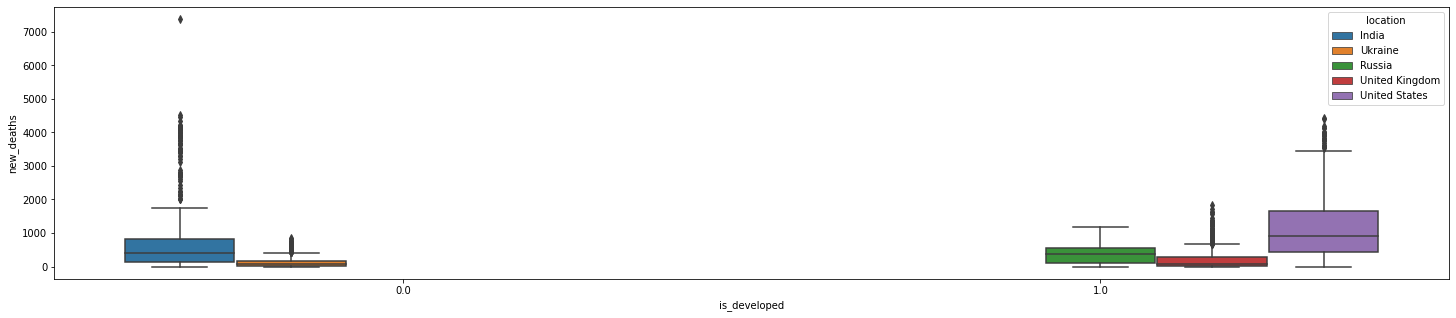

In [56]:
y7 = y \
    .values_in("iso_code", ["USA", "IND", "RUS", "UKR", "UKR", "GBR"]) \
    .transform(["human_development_index"], lambda x: "1" if (float(x) >= 0.8) else "0", "is_developed")

graphext.boxplot(y7, "is_developed", "new_deaths", "location")